---
# Effectifs des médecins par régions de 2013 à 2015
---
## Groupe Zacharie Barbecot, Didier Bertille, Jérémie Chattou

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
%matplotlib inline

***
### Lecture des 3 jeux de données
1<sup>er</sup> fichier:  DensiteMedecins-2015.xlsx | 2<sup>ème</sup> fichier: DensiteMedecins-2014.xlsx | 3<sup>ème</sup> fichier: DensiteMedecins-2013.xlsx
***

In [2]:
dfile2015 = pd.read_excel("./DensiteMedecins-2015.xlsx", skiprows=5,encoding="utf-8")
dfile2014 = pd.read_excel("./DensiteMedecins-2014.xlsx", skiprows=5,encoding="utf-8")
dfile2013 = pd.read_excel("./DensiteMedecins-2013.xlsx", skiprows=5,encoding="utf-8")

In [3]:
data2015 = pd.DataFrame(dfile2015)
data2014 = pd.DataFrame(dfile2014)
data2013 = pd.DataFrame(dfile2013)


**1. Mise en forme des jeux de données ** 

Création de la colonne année.


In [19]:
data2015[u"Année"] = 2015
data2014[u"Année"] = 2014
data2013[u"Année"] = 2013


**2. Récupération des colonnes intéressantes pour le jeu de données **

In [20]:
data_in2015 = data2015[['Zones inscription', u'Médecine générale', u'Année']]
data_in2014 = data2014[['Zones inscription', u'Médecine générale', u'Année']]
data_in2013 = data2013[['Zones inscription', u'Médecine générale', u'Année']]

***
### Mise en forme du graphique et du tableau - Densité des médecins par région en 2013 -2015

Récupération des régions, trie dela densité de médecins par ordre décroissant, affichage d'un graphique avec bar horizontal.
***


** 1. Mise en place des données **

Récupération des régions pour les jeux de données et trie selon la densité de médecins.

In [21]:
region2015 = data_in2015.iloc[2:29]
region2015sort = region2015.sort_values(u'Médecine générale')

region2014 = data_in2014.iloc[2:29]
region2014sort = region2014.sort_values(u'Médecine générale')

region2013 = data_in2013.iloc[2:29]
region2013sort = region2013.sort_values(u'Médecine générale')

** 2. Affichage du tableaux de densité de médecin - année 2015 **

In [7]:
region2015sort

,Zones inscription,Médecine générale,Année
21,Mayotte,52.2,2015
12,Guadeloupe,126.3,2015
20,Martinique,127.7,2015
8,Centre,129.6,2015
13,Guyane,132.6,2015
25,Picardie,134.1,2015
14,Haute-Normandie,136.2,2015
6,Bourgogne,140.1,2015
24,Pays de la Loire,144.1,2015
9,Champagne-Ardenne,144.3,2015



** 3. Insertion d'un label associé à la valeur de densité pour la région. **


In [8]:
def autolabel(rects, name_color):
    # attach some text labels
    for rect in rects:
        xloc = rect.get_x()+ rect.get_width() + 2.0
        yloc = rect.get_y() + rect.get_height()/2.0
        label = ax.text(xloc, yloc, rect.get_width(), horizontalalignment='left',
                       verticalalignment='center', color=name_color, weight='bold', size=8,
                         clip_on=True)

** 4. Création et mise en forme du graphique **

In [22]:
# Largeur de la barre horizontale.
width = 0.25
y_pos = range(len(region2015sort[u'Médecine générale']))
# Définition des labels pour l'axe des ordonnées du graphique.
regions_label = region2015sort.iloc[0:,0]

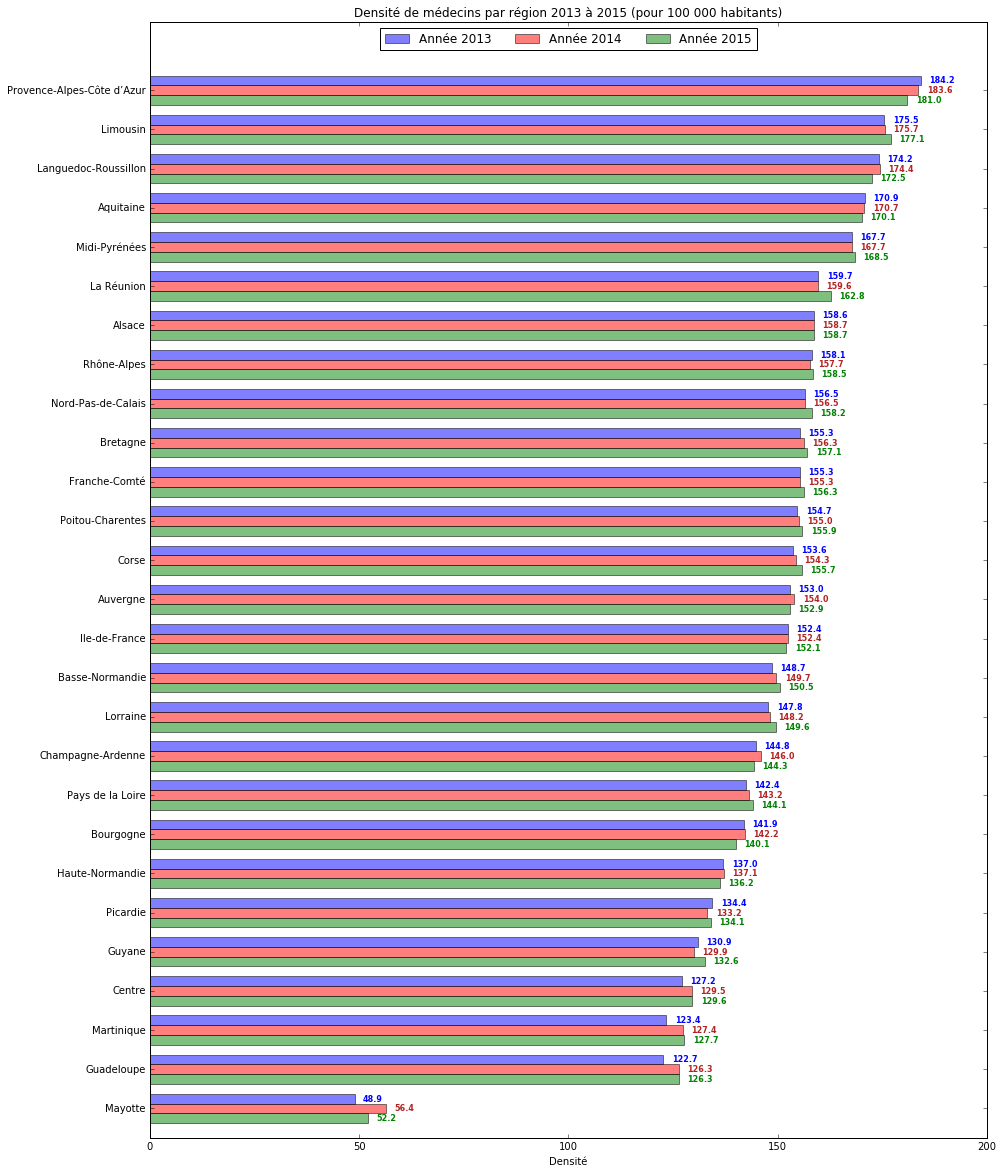

In [24]:
graph, ax = plt.subplots()

y_pos = np.arange(len(region2015sort[u'Médecine générale']))
rects1 = ax.barh(y_pos+0.5, region2013sort.iloc[0:,1], width, alpha=0.5, align='center', color='b')
rects2 = ax.barh(y_pos+0.25, region2014sort.iloc[0:,1], width, alpha=0.5, align='center', color='r')
rects3 = ax.barh(y_pos, region2015sort.iloc[0:,1], width, alpha=0.5, align='center', color='g')

# Propriétés du graphique (titre, ordonnées, abscisses, délimitation des valeurs affichées).
y_pos_label = y_pos + width
ax.set_xlabel(u'Densité')
ax.set_title(u'Densité de médecins par région 2013 à 2015 (pour 100 000 habitants)')
ax.set_yticks(y_pos_label)
ax.set_yticklabels(list(regions_label))
ax.set_ylim(-0.5,28)

# Ajout de la valeur correspondant à chaque barre horizontale.
autolabel(rects1, 'b')
autolabel(rects2, '#b22222')
autolabel(rects3, 'g')

ax.legend((rects1[0], rects2[0], rects3[0]), (u'Année 2013', u'Année 2014', u'Année 2015'), loc=9, ncol=3)

# Dimension du graphique.
graph.set_figheight(20)
graph.set_figwidth(15)
# Affichage du graphique.
plt.show()

***
### Création du jeu de données de l'année 2013 à 2015
Regroupements des 3 dataframes (jeu de données de 2013 à 2015).
***

In [26]:
# Concaténation de l'ensemble des 3 dataframes.
regions13_15 = pd.concat([region2013, region2014, region2015], ignore_index=True) 
regions13_15 = regions13_15.rename(columns = {u'Zones inscription':u'Nom région', u'Médecine générale':u'Généralistes'})
regions13_15

,Nom région,Généralistes,Année
0,Alsace,159.7,2013
1,Aquitaine,170.9,2013
2,Auvergne,153.0,2013
3,Basse-Normandie,147.8,2013
4,Bourgogne,141.9,2013
5,Bretagne,155.3,2013
6,Centre,130.9,2013
7,Champagne-Ardenne,144.8,2013
8,Corse,152.4,2013
9,Franche-Comté,158.6,2013


***
### Passage en format long et normalisation des données
Affichage des résultats dans un graphique  à l'aide la méthode plot.
***

** 1. Mise en oeuvre d'un graphique montrant l'évolution de la densité des médecins **

In [27]:
regions13_15 = regions13_15.sort_values([u'Nom région', u'Année'])
regions_names = regions13_15.set_index([u'Nom région', u'Année'])
regions_names = regions_names.unstack()
regions_names

Généralistes              
Année                              2013   2014   2015
Nom région                                           
Alsace                            159.7  159.6  158.7
Aquitaine                         170.9  170.7  170.1
Auvergne                          153.0  154.3  152.9
Basse-Normandie                   147.8  149.7  150.5
Bourgogne                         141.9  142.2  140.1
Bretagne                          155.3  156.5  157.1
Centre                            130.9  129.9  129.6
Champagne-Ardenne                 144.8  146.0  144.3
Corse                             152.4  152.4  155.7
Franche-Comté                     158.6  155.0  156.3
Guadeloupe                        123.4  127.4  126.3
Guyane                            127.2  129.5  132.6
Haute-Normandie                   137.0  137.1  136.2
Ile-de-France                     154.7  154.0  152.1
La Réunion                        153.6  157.7  162.8
Languedoc-Roussillon              174.2  174.4  172.5
Limousin                          175.5  175.7  177.1
Lorraine                          148.7  148.2  149.6
Martinique                        122.7  126.3  127.7
Mayotte                            48.9   56.4   52.2
Midi-Pyrénées                     167.7  167.7  168.5
Nord-Pas-de-Calais                155.3  156.3  158.2
Pays de la Loire                  142.4  143.2  144.1
Picardie                          134.4  133.2  134.1
Poitou-Charentes                  156.5  155.3  155.9
Provence-Alpes-Côte d’Azur        184.2  183.6  181.0
Rhône-Alpes                       158.1  158.7  158.5

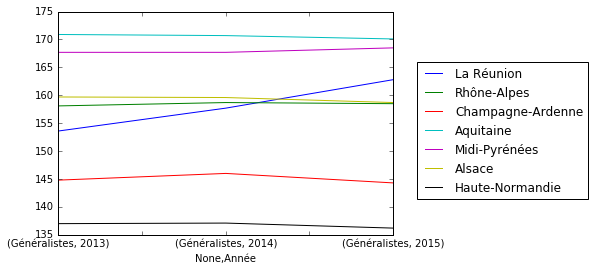

In [28]:
fig = regions_names.sample(7).T.plot()
fig.legend(bbox_to_anchor=(1.6, 0.8))

** 2. Mise en oeuvre du graphique normalisé **

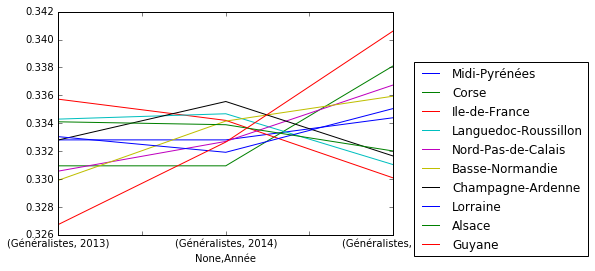

In [29]:
regions_names_norm=regions_names.div(regions_names.sum(axis=1), axis=0)
fig = regions_names_norm.sample(10).T.plot()
fig.legend(bbox_to_anchor=(1.6, 0.8))

***
### Algorithme de Clusterisation | ML/Stat
***

***
### Affichage densité par géolocalisation
Analyse d'un jeu de données contenant la longitude et latitude des régions françaises.
Affichage de la densité par des cercles rouges pour créer une carte de la France.
***

** 1. Récupération carte de la France **

In [30]:
from IPython.display import Image
Image(url="./France-regions.svg")

** 2. Récupération et rendu propre du jeu de données **

In [31]:
reader = pd.read_excel('./eucircos_regions_departements_circonscriptions_communes_gps.xlsx', encoding='utf-8')
tab = reader[[u'nom_région', u'chef-lieu_région', u'nom_commune', u'latitude', u'longitude']]

# Récupération des colonnes intéressantes.
tab = reader[[u'nom_région', u'chef-lieu_région', u'nom_commune', u'latitude', u'longitude']]

# Récupérations des données (lignes) de longitudes et latitudes des régions.
regions_LatLng = tab[tab[u'chef-lieu_région'] == tab[u'nom_commune']]
# Trie des données et suppression des doublons de lignes pour la colonne des chef-lieu_région.
regions_LatLng = regions_LatLng.sort_values([u'nom_région', u'nom_région', u'chef-lieu_région', u'nom_commune'])
regions_LatLng = regions_LatLng.drop_duplicates(u'chef-lieu_région')

# Réindexation des index de 0 à 26 et suppression de la colonne nom_commune.
regions_LatLng.index = range(len(regions_LatLng))
regions_LatLng = regions_LatLng[[u'nom_région', u'chef-lieu_région', u'latitude', u'longitude']]
regions_LatLng

,nom_région,chef-lieu_région,latitude,longitude
0,Alsace,Strasbourg,48.583333,7.75
1,Aquitaine,Bordeaux,44.833333,-0.566667
2,Auvergne,Clermont-Ferrand,45.783333,3.083333
3,Basse-Normandie,Caen,49.183333,-0.35
4,Bourgogne,Dijon,47.316667,5.016667
5,Bretagne,Rennes,48.083333,-1.683333
6,Centre,Orléans,47.916667,1.9
7,Champagne-Ardenne,Châlons-en-Champagne,48.958333,4.366667
8,Corse,Ajaccio,41.916667,8.733333
9,Franche-Comté,Besançon,47.250000,6.033333


** 3. Réalisation d'une nouvelle dataframe avec les informations de géolocalisation et de densité **

In [32]:
# Renommage des colonnes de la table précédente.
regions_LatLng=regions_LatLng.rename(columns = {u'nom_région':u'Nom région', u'chef-lieu_région':u'Chef-lieu', u'latitude':u'Latitude', u'longitude':u'Longitude'})

# Jointure des deux tables selon la colonne "Nom région".
result = pd.merge(regions13_15, regions_LatLng, on=[u'Nom région'])
result = result.set_index([u'Nom région', u'Chef-lieu', u'Latitude', u'Longitude', u'Année'])
result = result.unstack()
result

Généralistes  \
Année                                                                   2013   
Nom région           Chef-lieu            Latitude   Longitude                 
Alsace               Strasbourg            48.583333 7.75              159.7   
Aquitaine            Bordeaux              44.833333 -0.566667         170.9   
Auvergne             Clermont-Ferrand      45.783333 3.083333          153.0   
Basse-Normandie      Caen                  49.183333 -0.35             147.8   
Bourgogne            Dijon                 47.316667 5.016667          141.9   
Bretagne             Rennes                48.083333 -1.683333         155.3   
Centre               Orléans               47.916667 1.9               130.9   
Champagne-Ardenne    Châlons-en-Champagne  48.958333 4.366667          144.8   
Corse                Ajaccio               41.916667 8.733333          152.4   
Franche-Comté        Besançon              47.250000 6.033333          158.6   
Guadeloupe           Basse-Terre           16.129629 -61.653805        123.4   
Guyane               Cayenne               4.922420  -52.313453        127.2   
Haute-Normandie      Rouen                 49.433333 1.083333          137.0   
Ile-de-France        Paris                 48.864049 2.331053          154.7   
La Réunion           Saint-Denis          -20.878900 55.4481           153.6   
Languedoc-Roussillon Montpellier           43.600000 3.883333          174.2   
Limousin             Limoges               45.850000 1.25              175.5   
Lorraine             Metz                  49.133333 6.166667          148.7   
Martinique           Fort-de-France        14.616065 -61.05878         122.7   
Mayotte              Mamoudzou            -12.780949 45.227872          48.9   
Midi-Pyrénées        Toulouse              43.600000 1.433333          167.7   
Nord-Pas-de-Calais   Lille                 50.633333 3.066667          155.3   
Pays de la Loire     Nantes                47.216667 -1.55             142.4   
Picardie             Amiens                49.900000 2.3               134.4   
Poitou-Charentes     Poitiers              46.583333 0.333333          156.5   
Rhône-Alpes          Lyon                  45.759723 4.8422            158.1   

                                                                               
Année                                                             2014   2015  
Nom région           Chef-lieu            Latitude   Longitude                 
Alsace               Strasbourg            48.583333 7.75        159.6  158.7  
Aquitaine            Bordeaux              44.833333 -0.566667   170.7  170.1  
Auvergne             Clermont-Ferrand      45.783333 3.083333    154.3  152.9  
Basse-Normandie      Caen                  49.183333 -0.35       149.7  150.5  
Bourgogne            Dijon                 47.316667 5.016667    142.2  140.1  
Bretagne             Rennes                48.083333 -1.683333   156.5  157.1  
Centre               Orléans               47.916667 1.9         129.9  129.6  
Champagne-Ardenne    Châlons-en-Champagne  48.958333 4.366667    146.0  144.3  
Corse                Ajaccio               41.916667 8.733333    152.4  155.7  
Franche-Comté        Besançon              47.250000 6.033333    155.0  156.3  
Guadeloupe           Basse-Terre           16.129629 -61.653805  127.4  126.3  
Guyane               Cayenne               4.922420  -52.313453  129.5  132.6  
Haute-Normandie      Rouen                 49.433333 1.083333    137.1  136.2  
Ile-de-France        Paris                 48.864049 2.331053    154.0  152.1  
La Réunion           Saint-Denis          -20.878900 55.4481     157.7  162.8  
Languedoc-Roussillon Montpellier           43.600000 3.883333    174.4  172.5  
Limousin             Limoges               45.850000 1.25        175.7  177.1  
Lorraine             Metz                  49.133333 6.166667    148.2  149.6  
Martinique           Fort-de-France        14.616065 -61.05878 